# <div>
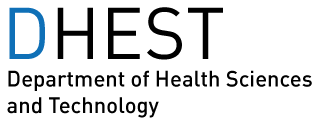
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQe1ZHapHvYNyrCLtdygLfLu92gN3ztZ64m9U8eNLeYE5BKY7r9wJiBgH7cnhZ7B269qw&usqp=CAU" width="300" align="left" style="display: inline;"/>
    <div ><h1 style="display: inline;"><br/>FoDS Group Project G5G </h1></div>

 </div>

 

The data used in this group project belongs to THE BIG CITIES HEALTH INVENTORY DATA PLATFORM which provides public health data from 35 large US-American cities. The dataset includes categories like infectious diseases (e.g. HIV/AIDS), chronic conditions (e.g. diabetes, cardiovascular), mental health. In addition, information on violence and crime, socio-economic factors and the built environment are available.

The goal of this group project is to create 4 Machine Learning Models that predict diabetes prevalence using the information on built-environment.
The following 4 ML models will be applied and the data will be split using leave-one-out crossvalidation:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression

In a further step their performances will be evaluated, compared and visualized.

In [1]:
# Import packages that are needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# For linear regression
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For ridge regression
from sklearn.linear_model import Ridge

# For lasso regression
from sklearn.linear_model import Lasso

# For random forest regression
from sklearn.ensemble import RandomForestRegressor

# For Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 1- Getting familiar with the data: Data Exploration

In [4]:
data = pd.read_csv('../data/BigCitiesHealth.csv')
display(data)

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male,Asian/PI Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Chicago,IL,"Chicago, IL",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Kansas City,MO,"Kansas City, MO",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://

In [5]:
data.iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

,geo_label_citystate,geo_fips_code,value,date_label,geo_label_proxy_or_real,geo_label_proxy_footnote,geo_fips_desc,date_label_proxy_or_real,date_label_proxy_footnote,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
0,"Dallas, TX",4819000.0,271.876868,2020,real,NaN,place,real,NaN,yes,240.233095,307.293299,NaN,NaN
1,"Fort Worth, TX",4827000.0,333.954685,2020,real,NaN,place,real,NaN,yes,161.906352,629.881493,NaN,NaN
2,"San Antonio, TX",4865000.0,85.391551,2020,real,NaN,place,real,NaN,yes,73.839052,98.550579,NaN,NaN
3,"Chicago, IL",1714000.0,354.585206,2020,real,NaN,place,real,NaN,yes,328.986597,382.175123,NaN,NaN
4,"Kansas City, MO",2938000.0,187.017704,2020,real,NaN,place,real,NaN,yes,104.928717,316.971329,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,"New York City, NY",3651000.0,5786.217877,2020,real,NaN,place,real,NaN,yes,5668.487295,5903.948459,NaN,NaN
148288,"Milwaukee, WI",5553000.0,7087.929743,2020,real,NaN,place,real,NaN,yes,6458.346917,7717.512570,NaN,NaN
148289,"Houston, TX",4835000.0,4099.348306,2011,real,NaN,place,real,NaN,yes,3723.288703,4475.407910,NaN,NaN
148290,"Milwaukee, WI",5553000.0,5706.528569,2014,real,NaN,place,real,NaN,yes,4594.357077,6818.700061,NaN,NaN


In [6]:
data.iloc[:,1].unique()

array(['Infectious Diseases', 'Chronic Health Conditions',
       'Physical and Built Environment', 'Life Expectancy and Deaths',
       'Access to Health Services', 'Maternal and Child Health',
       'Mental Health and Substance Use', 'Poisoning',
       'Violence and Injury', 'Social and Economic Factors',
       'Demographics'], dtype=object)

In [7]:
data.iloc[:,2].unique()

array(['Respiratory Infection', 'Diabetes and Obesity',
       'Active Transportation', 'Deaths', 'Life Expectancy at Birth',
       'Health Insurance', 'Oral Health', 'Births', 'Disability',
       'Respiratory Disease', 'Cancer', 'Cardiovascular Disease',
       'Physical Activity', 'Dietary Quality',
       'Sexually Transmitted Disease', 'Birth Control', 'Substance Use',
       'Mental Health', 'Lead Poisoning', 'Crime Incidents',
       'School Violence', 'Housing', 'Education', 'Income',
       'Income-related', 'Income Inequality',
       'Racial Segregation Indices', 'Food Access', 'Transportation',
       'Air Quality', 'Population', 'Race/Ethnicity',
       'Language and Nativity'], dtype=object)

In [8]:
data.iloc[:,3].unique()

array(['Deaths from COVID-19 (per 100,000 population, age-adjusted)',
       'Deaths from diabetes (per 100,000 population, age-adjusted)',
       'Percent of workers aged 16+ who walk to work',
       'Deaths from all causes (per 100,000 population, age-adjusted)',
       'Life expectancy at birth (years, age-adjusted, 5-year estimate)',
       'Percent of the population without health insurance',
       'Percent of children aged <19 without health insurance',
       'Percent of adults aged 18+ visited dentist or dental clinic in the past year',
       'Percent of births for which prenatal care began in the first trimester',
       'Percent of the population with a long-term disability of any kind',
       'Percent of high school students ever diagnosed with asthma',
       'Deaths from all types of cancer (per 100,000 population, age-adjusted)',
       'Deaths from breast cancer in females (per 100,000 population, age-adjusted)',
       'Deaths from lung cancer (per 100,000 populatio

In [9]:
print(data['geo_label_citystate'].unique())
print(data['geo_label_citystate'].unique().shape)

['Dallas, TX' 'Fort Worth, TX' 'San Antonio, TX' 'Chicago, IL'
 'Kansas City, MO' 'Seattle, WA' 'Portland, OR' 'San Jose, CA'
 'Washington, DC' 'Las Vegas, NV' 'New York City, NY' 'Boston, MA'
 'Cleveland, OH' 'San Francisco, CA' 'Philadelphia, PA' 'Oakland, CA'
 'Los Angeles, CA' 'Milwaukee, WI' 'Phoenix, AZ' 'Oklahoma City, OK'
 'Charlotte, NC' 'Baltimore, MD' 'Columbus, OH' 'Denver, CO'
 'Long Beach, CA' 'Louisville, KY' 'Minneapolis, MN' 'Indianapolis, IN'
 'Memphis, TN' 'San Diego, CA' 'El Paso, TX' 'Austin, TX' 'Houston, TX'
 'Detroit, MI' 'Tucson, AZ' 'U.S. Total']
(36,)


In [10]:
data['date_label'].unique()

array([2020, 2011, 2010, 2017, 2019, 2018, 2014, 2016, 2013, 2012, 2015],
      dtype=int64)

## 2- Preprocessing the Data

In [11]:
# Preprocess our the Data that is relevant for prevalence of diabetes (outcome) and the built-environment (features)

features = data[
    (data['metric_cat_label'] == 'Physical and Built Environment') &
    (data['date_label'] == 2018) &
    (data['geo_label_citystate'] != 'U.S. Total') &
    (data['strata_sex_label'] == 'Both') &
    (data['strata_race_label'] == 'All')
]


outcome = data[
    (data['metric_item_label'] == 'Diabetes') &
    (data['date_label'] == 2018) &
    (data['geo_label_citystate'] != 'U.S. Total') &
    (data['strata_sex_label'] == 'Both') &
    (data['strata_race_label'] == 'All')
]

In [12]:
features

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
131386,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
131392,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,Louisville,KY,"Louisville, KY",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
131393,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,Memphis,TN,"Memphis, TN",...,NaN,NaN,South,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
131412,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,Minneapolis,MN,"Minneapolis, MN",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
131420,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137834,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,Percent,U.S. Environmental Protection Agency,https://www.epa.gov/outdoor-air-quality-data,San Diego,CA,"San Diego, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
137835,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,Percent,U.S. Environmental Protection Agency,https://www.epa.gov/outdoor-air-quality-data,Los Angeles,CA,"Los Angeles, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
137836,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,Percent,U.S. Environmental Protection Agency,https://www.epa.gov/outdoor-air-quality-data,Oakland,CA,"Oakland, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
137837,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,Percent,U.S. Environmental Protection Agency,https://www.epa.gov/outdoor-air-quality-data,Tucson,AZ,"Tucson, AZ",...,NaN,NaN,West,Poorest cities (20%+ poor),Sma

In [13]:
outcome

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
43309,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Philadelphia,PA,"Philadelphia, PA",...,NaN,NaN,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN
43311,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43315,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Columbus,OH,"Columbus, OH",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43316,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Cleveland,OH,"Cleveland, OH",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
43319,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Oklahoma City,OK,"Oklahoma City, OK",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43321,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Baltimore,MD,"Baltimore, MD",...,NaN,NaN,South,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
43336,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Las Vegas,NV,"Las Vegas, NV",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43349,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Oakland,CA,"Oakland, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43363,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,San Francisco,CA,"San Francisco, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Highest pop. density (>10k per sq mi),Less Segregated (<50%),All,Both,NaN
43420,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Los Angeles,CA,"Los Ange

In [14]:
# Handle Missing Data:
print(features.isna().sum())
print(outcome.isna().sum())
# no missing values in columns of interest

# Search for possible duplicated rows:
print(features.duplicated().sum())
print(outcome.duplicated().sum())
# There are no duplicats

metric_item_label                    0
metric_cat_label                     0
metric_subcat_label                  0
metric_item_label_subtitle           0
metric_cat_item_yaxis_label          0
metric_source_desc_label_fn          0
metric_source_desc_label_url_fn      0
geo_label_city                       0
geo_label_state                      0
geo_label_citystate                  0
geo_fips_code                        0
value                                0
date_label                           0
geo_label_proxy_or_real              0
geo_label_proxy_footnote           315
geo_fips_desc                        0
date_label_proxy_or_real             0
date_label_proxy_footnote           70
value_ci_flag_yesno                  0
value_95_ci_low                    315
value_95_ci_high                   315
value_90_ci_low                    315
value_90_ci_high                   315
geo_strata_region                    0
geo_strata_poverty                   0
geo_strata_Population    

In [15]:
print(features['metric_item_label'].unique())
print(features['metric_item_label'].unique().shape)

['Limited Supermarket Access' 'Walking to Work' 'Riding Bike to Work'
 'Lack of Car' 'Public Transportation Use' 'Drives Alone to Work'
 'Longer Driving Commute Time' 'Poor Air Quality' 'Hazardous Air Quality']
(9,)


In [16]:
print(outcome['metric_item_label'].unique())
print(outcome['metric_item_label'].unique().shape)

['Diabetes']
(1,)


In [17]:
features = features.pivot(index = 'geo_label_citystate', columns = 'metric_item_label', values = 'value')
features

metric_item_label,Drives Alone to Work,Hazardous Air Quality,Lack of Car,Limited Supermarket Access,Longer Driving Commute Time,Poor Air Quality,Public Transportation Use,Riding Bike to Work,Walking to Work
geo_label_citystate,,,,,,,,,
"Austin, TX",73.742798,2.465753,6.187564,53.410736,33.133064,34.520548,3.489359,1.285146,2.409166
"Baltimore, MD",60.164552,2.197802,28.900199,45.267286,43.143126,32.417582,17.486046,0.938746,6.437840
"Boston, MA",38.274913,0.273973,34.221696,16.368908,50.765315,34.794521,33.286003,2.267323,15.112459
"Charlotte, NC",76.298476,1.388889,6.409073,56.727806,35.464175,32.777778,3.301090,0.142028,2.067071
"Chicago, IL",48.843116,5.205479,26.908905,24.637962,60.244648,58.356164,28.221544,1.707568,6.530898
"Cleveland, OH",69.306185,3.013699,23.012155,46.745246,25.692221,39.452055,9.772588,0.613079,5.069960
"Columbus, OH",79.381475,0.547945,8.874129,60.118738,24.685168,28.493151,3.085627,0.597486,3.076661
"Dallas, TX",76.710433,5.205479,9.288470,50.986243,41.281494,34.246575,3.760092,0.192140,2.090902
"Denver, CO",69.124119,2.739726,9.843417,48.139841,38.832899,51.506849,6.539476,2.227180,4.682016


In [18]:
outcome = outcome.pivot(index = 'geo_label_citystate', columns = 'metric_item_label', values = 'value')
outcome

metric_item_label,Diabetes
geo_label_citystate,
"Austin, TX",7.5
"Baltimore, MD",13.7
"Boston, MA",8.0
"Charlotte, NC",9.2
"Chicago, IL",10.9
"Cleveland, OH",17.3
"Columbus, OH",11.0
"Dallas, TX",11.3
"Denver, CO",7.0


In [19]:
# Drop the city lables and index it with numbers to make Leave-one-out crossvalidation possible:
outcome = outcome.reset_index(drop=True)

In [20]:
outcome

metric_item_label,Diabetes
0,7.5
1,13.7
2,8.0
3,9.2
4,10.9
5,17.3
6,11.0
7,11.3
8,7.0
9,18.5


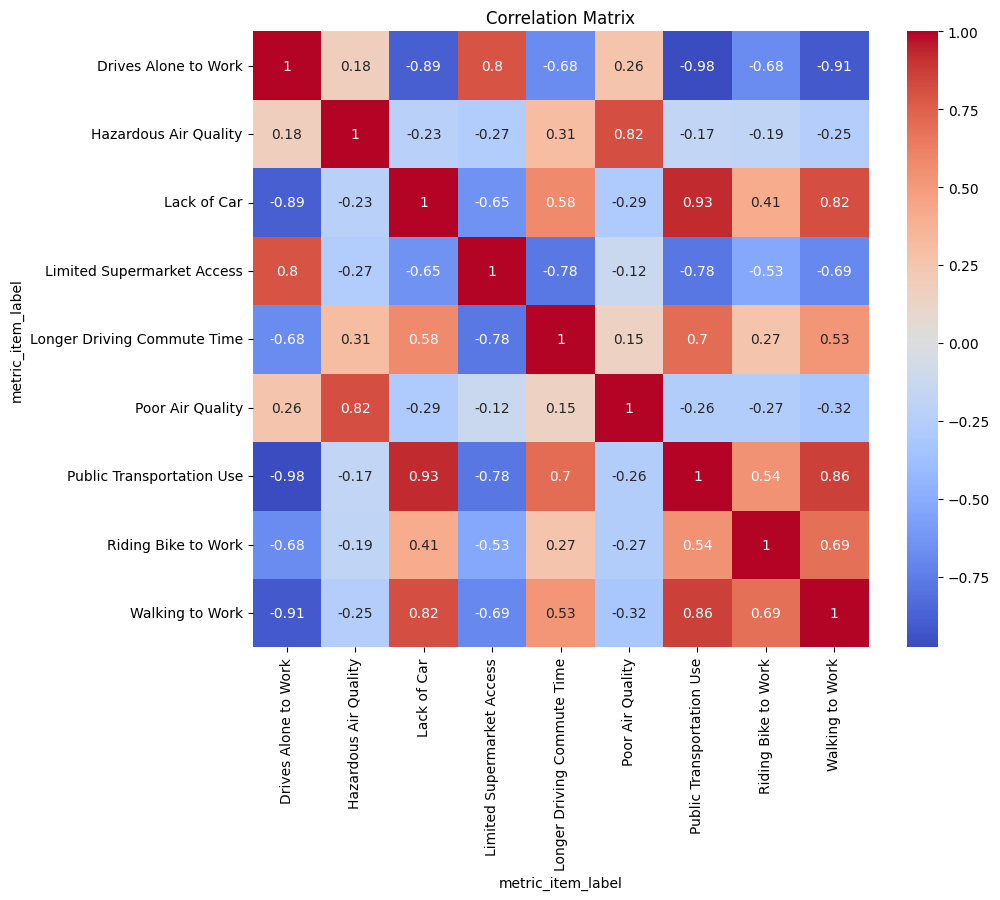

In [34]:
# To make sure that the features are independent, features that are highly correlated need to be reduced to one single feature

# Compute the correlation matrix
corr_matrix = features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# The following correlated features should be dropped: Correlation >= 0.9: ???????????????????????????????

## 3- Machine Learing Models
### 3.1- Linear Regression

In [23]:
# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize a list to store the predicted outcomes
predicted_outcomes = []

# Initialize a list to store the absolute errors
absolute_errors = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(features):
    
    # Split the data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the outcome for the test set
    y_pred = model.predict(X_test)
    predicted_outcomes.append(y_pred[0])
    
    # Compute the absolute error for the test set
    absolute_error = abs(y_test.iloc[0] - y_pred[0])
    absolute_errors.append(absolute_error)

# Compute the mean squared error (MSE) & root mean squared error (RMSE) of the predicted outcomes
mse_linear = mean_squared_error(outcome, predicted_outcomes)
rmse_linear = np.sqrt(mse_linear)

# Compute the R-squared of the linear regression model
r2_linear = model.score(features, outcome)

# Compute the Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(outcome, predicted_outcomes)


# Print the mean squared error
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared:", r2_linear)
print("Mean Absolute Error:", mae_linear)

# Fit the linear regression model using all the data
model = LinearRegression()
model.fit(features, outcome)

# Print the coefficients of the linear regression model
features_names = list(features.columns)
coef_linear = model.coef_.tolist()[0]

for i, feature_name in enumerate(features_names):
    print("Coefficient for", feature_name,":", coef_linear[i])

Mean Squared Error: 6.501224144798729
Root Mean Squared Error: 2.5497498200409248
R-squared: 0.6728814588566479
Mean Absolute Error: 1.9396855467609864
Coefficient for Drives Alone to Work : -0.17254793927294898
Coefficient for Hazardous Air Quality : 0.025196174644577546
Coefficient for Lack of Car : 0.4415990271842587
Coefficient for Limited Supermarket Access : 0.029712105743736603
Coefficient for Longer Driving Commute Time : 0.009711053186390976
Coefficient for Poor Air Quality : -0.007991047331793802
Coefficient for Public Transportation Use : -0.42561075303430945
Coefficient for Riding Bike to Work : -0.6135476177711299
Coefficient for Walking to Work : -0.501014756172236


### 3.2- Ridge Regression

In [24]:
# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize a list to store the predicted outcomes
predicted_outcomes = []

# Initialize a list to store the absolute errors
absolute_errors = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(features):
    
    # Split the data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]

    # Fit the Ridge regression model
    alpha = 1.0  # regularization parameter --> HYPER-PARAMETER
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Predict the outcome for the test set
    y_pred = model.predict(X_test)
    predicted_outcomes.append(y_pred[0])
    
    # Compute the absolute error for the test set
    absolute_error = abs(y_test.iloc[0] - y_pred[0])
    absolute_errors.append(absolute_error)


# Compute the mean squared error (MSE) & root mean squared error (RMSE) of the predicted outcomes
mse_ridge = mean_squared_error(outcome, predicted_outcomes)
rmse_ridge = np.sqrt(mse_ridge)

# Compute the R-squared of the linear regression model
r2_ridge = model.score(features, outcome)

# Compute the Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(outcome, predicted_outcomes)

# Print the mean squared error
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R-squared:", r2_ridge)
print("Mean Absolute Error:", mae_ridge)

# Fit the Ridge regression model using all the data
model = Ridge(alpha=alpha)
model.fit(features, outcome)

# Print the coefficients of the Ridge regression model
coef_ridge = model.coef_.tolist()[0]

for i, feature_name in enumerate(features_names):
    print("Coefficient for", feature_name,":", coef_ridge[i])

Mean Squared Error: 6.416186303388228
Root Mean Squared Error: 2.533019207070532
R-squared: 0.6717558459494413
Mean Absolute Error: 1.928243412037965
Coefficient for Drives Alone to Work : -0.14738089731785076
Coefficient for Hazardous Air Quality : 0.023600748801539062
Coefficient for Lack of Car : 0.44006800726364464
Coefficient for Limited Supermarket Access : 0.03051742532582448
Coefficient for Longer Driving Commute Time : 0.011603412685701548
Coefficient for Poor Air Quality : -0.006814067069062726
Coefficient for Public Transportation Use : -0.4009945959249696
Coefficient for Riding Bike to Work : -0.553753029873654
Coefficient for Walking to Work : -0.48422374379912064


### 3.3- Lasso Regression

In [25]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize a list to store the predicted outcomes
predicted_outcomes = []

# Initialize a list to store the absolute errors
absolute_errors = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(features):
    
    # Split the data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]

    # Fit the Lasso regression model
    alpha = 1.0  # regularization parameter --> HYPER-PARAMETER
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    # Predict the outcome for the test set
    y_pred = model.predict(X_test)
    predicted_outcomes.append(y_pred[0])
    
    # Compute the absolute error for the test set
    absolute_error = abs(y_test.iloc[0] - y_pred[0])
    absolute_errors.append(absolute_error)

# Compute the mean squared error (MSE) & root means squared error (RMSE) of the predicted outcomes
mse_lasso = mean_squared_error(outcome, predicted_outcomes)
rmse_lasso = np.sqrt(mse_lasso)

# Compute the R-squared of the linear regression model
r2_lasso = model.score(features, outcome)

# Compute the Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(outcome, predicted_outcomes)

# Print the mean squared error
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R-squared:", r2_lasso)
print("Mean Absolute Error:", mae_lasso)

# Fit the Lasso regression model using all the data
model = Lasso(alpha=alpha)
model.fit(features, outcome)

# Print the coefficients of the Lasso regression model
coef_lasso = model.coef_.tolist()
coef_lasso

for i, feature_name in enumerate(features_names):
    print("Coefficient for", feature_name,":", coef_lasso[i])


Mean Squared Error: 4.37055981793227
Root Mean Squared Error: 2.090588390365801
R-squared: 0.579328627867365
Mean Absolute Error: 1.710713161820088
Coefficient for Drives Alone to Work : 0.19746819967203297
Coefficient for Hazardous Air Quality : 0.0
Coefficient for Lack of Car : 0.3048594609275577
Coefficient for Limited Supermarket Access : 0.03613885489024168
Coefficient for Longer Driving Commute Time : 0.0
Coefficient for Poor Air Quality : 0.012133834606500431
Coefficient for Public Transportation Use : -0.0
Coefficient for Riding Bike to Work : -0.0
Coefficient for Walking to Work : -0.0


### 3.4- Random Forest Regression

In [26]:
# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize a list to store the predicted outcomes
predicted_outcomes = []

# Initialize a list to store the absolute errors
absolute_errors = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(features):
    
    # Split the data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]

    # Fit the Random Forest regression model
    n_estimators = 100  # number of trees in the forest --> HYPER-PARAMETER
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)

    # Predict the outcome for the test set
    y_pred = model.predict(X_test)
    predicted_outcomes.append(y_pred[0])
    
    # Compute the absolute error for the test set
    absolute_error = abs(y_test.iloc[0] - y_pred[0])
    absolute_errors.append(absolute_error)

# Compute the mean squared error (MSE) & root mean squared error (RMSE) of the predicted outcomes
mse_rf = mean_squared_error(outcome, predicted_outcomes)
rmse_rf = np.sqrt(mse_rf)

# Compute the R-squared of the linear regression model
r2_rf = model.score(features, outcome)

# Compute the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(outcome, predicted_outcomes)

# Print the mean squared error
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)
print("Mean Absolute Error:", mae_rf)

# Fit the Random Forest regression model using all the data
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(features, outcome)

# Print the feature importances of the Random Forest regression model
print("Feature Importances:", model.feature_importances_)

Mean Squared Error: 5.319578742857142
Root Mean Squared Error: 2.3064211980592666
R-squared: 0.8932864471389091
Mean Absolute Error: 1.834571428571428
Feature Importances: [0.08312791 0.03965545 0.16245912 0.087298   0.107798   0.05764938
 0.04097749 0.35787194 0.06316271]


## 4- Evaluation & comparison of  the ML models’ performance (visualisation of results)

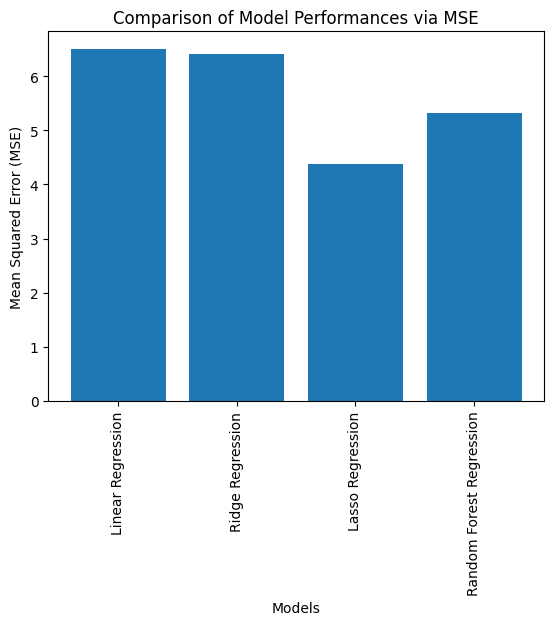

In [27]:
# Initialize the models
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regression']

# MSE scores
mse_scores = [mse_linear, mse_ridge, mse_lasso, mse_rf]

# Plot the MSE scores
plt.bar(model_names, mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Model Performances via MSE')
plt.xticks(rotation=90)
plt.show()



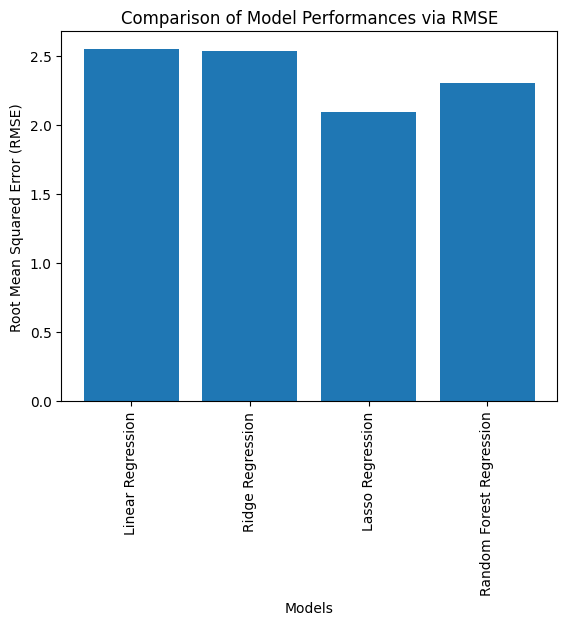

In [28]:
# RMSE scores
rmse_scores = [rmse_linear, rmse_ridge, rmse_lasso, rmse_rf]

# Plot the RMSE scores
plt.bar(model_names, rmse_scores)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Model Performances via RMSE')
plt.xticks(rotation=90)
plt.show()



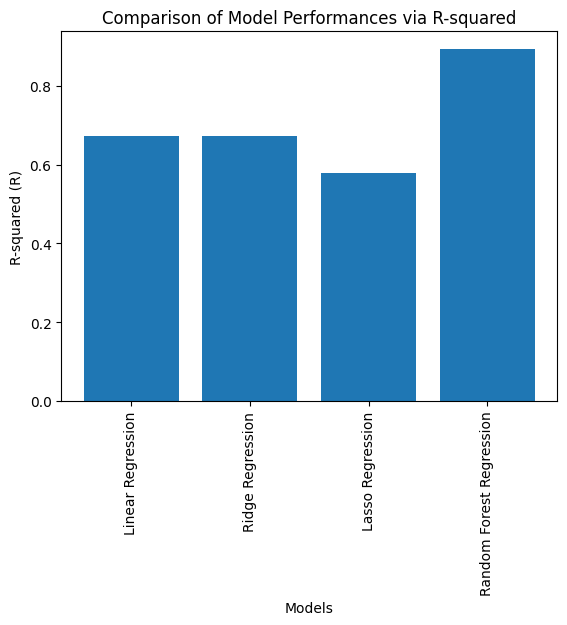

In [29]:
# R2 scores
r2_scores = [r2_linear, r2_ridge, r2_lasso, r2_rf]

# Plot the MSE scores
plt.bar(model_names, r2_scores)
plt.xlabel('Models')
plt.ylabel('R-squared (R)')
plt.title('Comparison of Model Performances via R-squared')
plt.xticks(rotation=90)
plt.show()




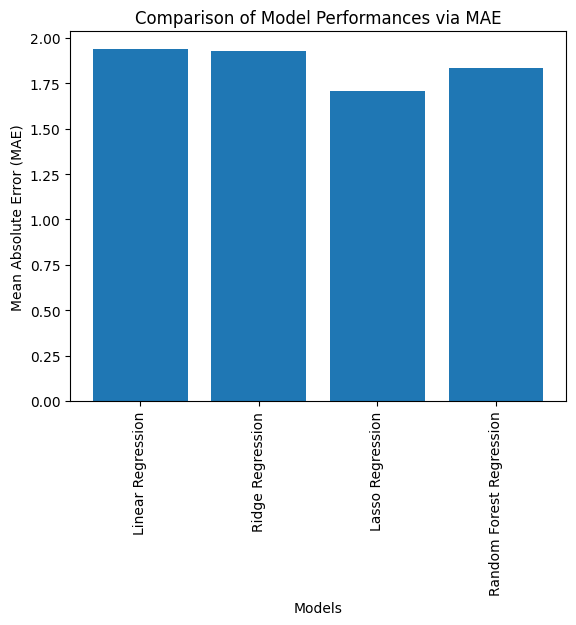

In [30]:
# MAE scores
mae_scores = [mae_linear, mae_ridge, mae_lasso, mae_rf]

# Plot the MSE scores
plt.bar(model_names, mae_scores)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Model Performances via MAE')
plt.xticks(rotation=90)
plt.show()